In [34]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [17]:
def target(x1, x2):
    return np.exp(-(x1 - 2)**2) + np.exp(-(x2 - 6)**2/10) + 1/ (x1**2 + 1)

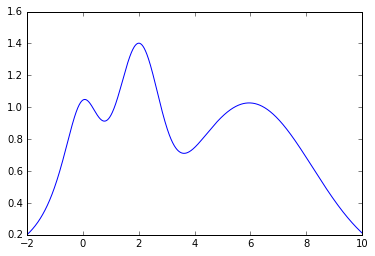

In [19]:
x1 = np.linspace(-2, 10, 1000)
x2 = np.linspace(-2,10,1000)
y = target(x1, x2)

plt.plot(x1,y)

In [41]:
from matplotlib.mlab import griddata

x1 = uniform(-2, 10, 200)
x2 = uniform(-2,10,200)
y = target(x1, x2)

x11 = np.linspace(0, 1, 1000)
x22 = np.linspace(0, 1, 1000)

yy = griddata(x1, x2, y, x11, x22, interp='linear')


In [44]:
print type(np.linspace(0,1,100))

<type 'numpy.ndarray'>


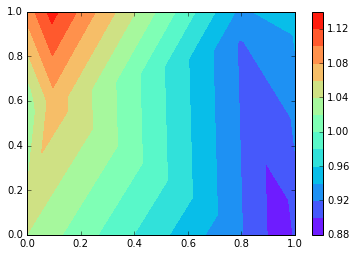

In [31]:
CS = plt.contourf(x11, x22, yy, 15, cmap=plt.cm.rainbow)
plt.colorbar()  # draw colorbar
# plot data points.
plt.show()

In [32]:
bo = BayesianOptimization(target, {'x1': (-2, 10), 'x2':(-2,10)})

gp_params = {'corr': 'cubic'}
bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5, **gp_params)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
    1 | 00m00s |    0.39896 |    7.7124 |    2.8996 | 
    2 | 00m00s |    0.32279 |    6.5084 |    2.5289 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


In [9]:

def posterior(bo, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma2 = bo.gp.predict(np.linspace(xmin, xmax, 1000).reshape(-1, 1), eval_MSE=True)
    return mu, np.sqrt(sigma2)

def plot_gp(bo, x1, x2, y):
   
    
    
    plt.contourf(x11, x22, yy, 15, cmap=plt.cm.rainbow, label = 'Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    
    
    
    
    #################################
    mu, sigma = posterior(bo)
    
    axis.plot(x, y, linewidth=3, label='Target')
    
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x.reshape((-1, 1)), bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

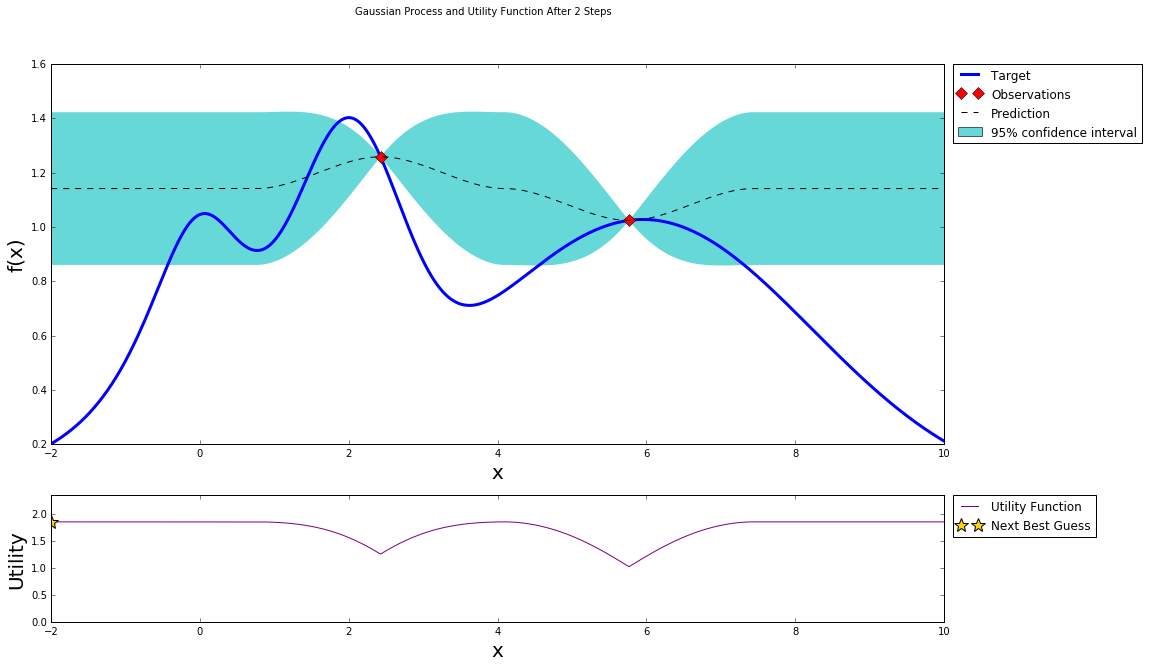

In [10]:

plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m01s |    0.78323 |    3.1979 | 


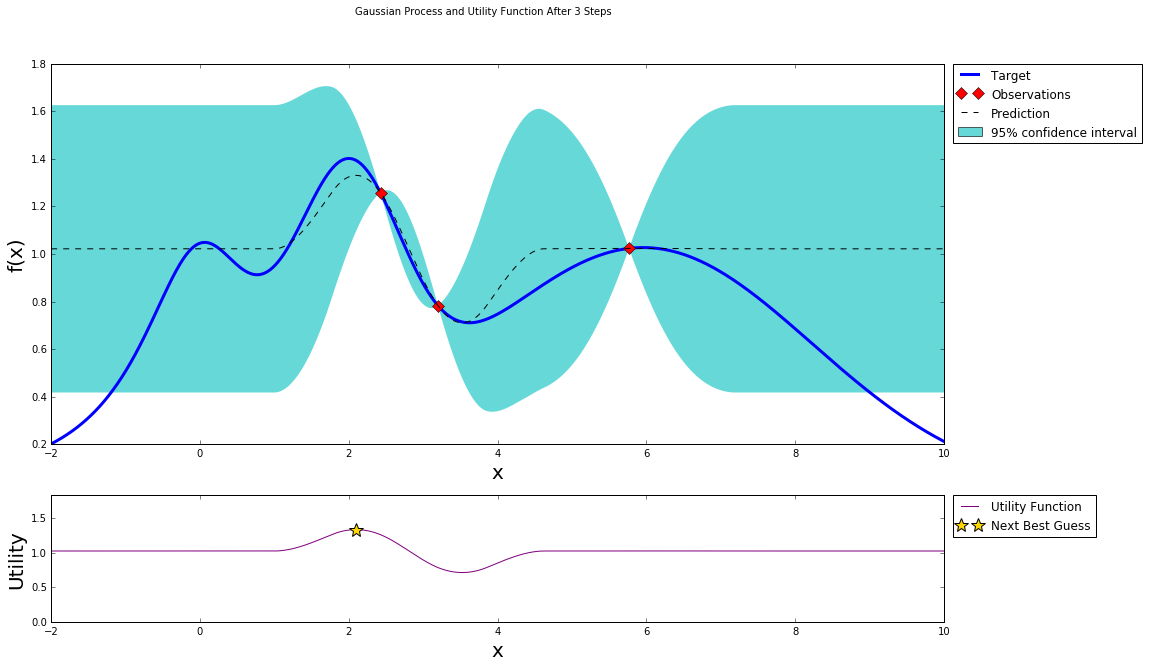

In [11]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Automatically created module for IPython interactive environment


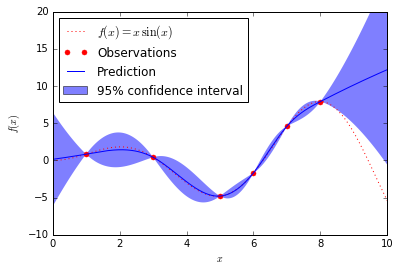

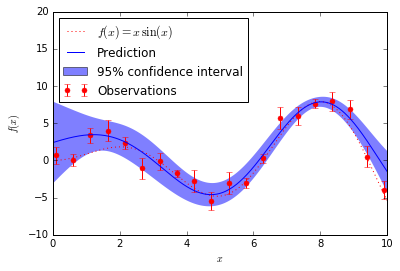

In [45]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
# Licence: BSD 3 clause

import numpy as np
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.plot(X, y, 'r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

#----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y) ** 2,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = pl.figure()
pl.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
pl.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
pl.plot(x, y_pred, 'b-', label=u'Prediction')
pl.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
pl.xlabel('$x$')
pl.ylabel('$f(x)$')
pl.ylim(-10, 20)
pl.legend(loc='upper left')

pl.show()

Automatically created module for IPython interactive environment


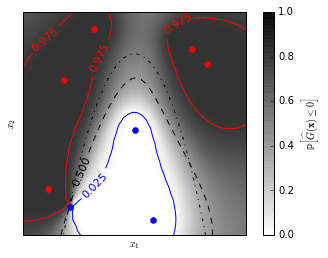

In [46]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
# Licence: BSD 3 clause

import numpy as np
from scipy import stats
from sklearn.gaussian_process import GaussianProcess
from matplotlib import pyplot as pl
from matplotlib import cm

# Standard normal distribution functions
phi = stats.distributions.norm().pdf
PHI = stats.distributions.norm().cdf
PHIinv = stats.distributions.norm().ppf

# A few constants
lim = 8


def g(x):
    """The function to predict (classification will then consist in predicting
    whether g(x) <= 0 or not)"""
    return 5. - x[:, 1] - .5 * x[:, 0] ** 2.

# Design of experiments
X = np.array([[-4.61611719, -6.00099547],
              [4.10469096, 5.32782448],
              [0.00000000, -0.50000000],
              [-6.17289014, -4.6984743],
              [1.3109306, -6.93271427],
              [-5.03823144, 3.10584743],
              [-2.87600388, 6.74310541],
              [5.21301203, 4.26386883]])

# Observations
y = g(X)

# Instanciate and fit Gaussian Process Model
gp = GaussianProcess(theta0=5e-1)

# Don't perform MLE or you'll get a perfect prediction for this simple example!
gp.fit(X, y)

# Evaluate real function, the prediction and its MSE on a grid
res = 50
x1, x2 = np.meshgrid(np.linspace(- lim, lim, res),
                     np.linspace(- lim, lim, res))
xx = np.vstack([x1.reshape(x1.size), x2.reshape(x2.size)]).T

y_true = g(xx)
y_pred, MSE = gp.predict(xx, eval_MSE=True)
sigma = np.sqrt(MSE)
y_true = y_true.reshape((res, res))
y_pred = y_pred.reshape((res, res))
sigma = sigma.reshape((res, res))
k = PHIinv(.975)

# Plot the probabilistic classification iso-values using the Gaussian property
# of the prediction
fig = pl.figure(1)
ax = fig.add_subplot(111)
ax.axes.set_aspect('equal')
pl.xticks([])
pl.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
pl.xlabel('$x_1$')
pl.ylabel('$x_2$')

cax = pl.imshow(np.flipud(PHI(- y_pred / sigma)), cmap=cm.gray_r, alpha=0.8,
                extent=(- lim, lim, - lim, lim))
norm = pl.matplotlib.colors.Normalize(vmin=0., vmax=0.9)
cb = pl.colorbar(cax, ticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], norm=norm)
cb.set_label('${\\rm \mathbb{P}}\left[\widehat{G}(\mathbf{x}) \leq 0\\right]$')

pl.plot(X[y <= 0, 0], X[y <= 0, 1], 'r.', markersize=12)

pl.plot(X[y > 0, 0], X[y > 0, 1], 'b.', markersize=12)

cs = pl.contour(x1, x2, y_true, [0.], colors='k', linestyles='dashdot')

cs = pl.contour(x1, x2, PHI(- y_pred / sigma), [0.025], colors='b',
                linestyles='solid')
pl.clabel(cs, fontsize=11)

cs = pl.contour(x1, x2, PHI(- y_pred / sigma), [0.5], colors='k',
                linestyles='dashed')
pl.clabel(cs, fontsize=11)

cs = pl.contour(x1, x2, PHI(- y_pred / sigma), [0.975], colors='r',
                linestyles='solid')
pl.clabel(cs, fontsize=11)

pl.show()

In [47]:
from scipy.stats.distributions import norm
from sklearn.gaussian_process import GaussianProcess

# expected improvement
def EI(mu, sigma, f_x_plus, Xi=0):
    Z = (mu-f_x_plus-Xi)/sigma
    Z[sigma==0] = 0
    result = (mu-f_x_plus-Xi)*norm.cdf(Z) + sigma*norm.pdf(Z)
    result[sigma==0] = 0
    return result

def BayesOptimize(X, y, bounds, grid_size=1000, return_grid=False, Xi=0.01):
    gp = GaussianProcess(corr='cubic')
    gp.fit(X, y)

    Xgrid = np.random.rand(grid_size, len(bounds))
    for i, b in enumerate(bounds):
        Xgrid[:,i] = Xgrid[:,i]*(b[1]-b[0]) + b[0]

    mu, mse = gp.predict(Xgrid, eval_MSE=True)
    mu, sigma = mu.ravel(), np.sqrt(mse).ravel()
    
    acqu = EI(mu, sigma, np.max(y), Xi=Xi)

    next_x = Xgrid[np.argmax(acqu),:]

    if return_grid:
        return next_x, (Xgrid, mu, sigma, acqu)
    else:
        return next_x